## From Tweets to Tasks: An Agile NLP Framework for Real-Time Customer Insights

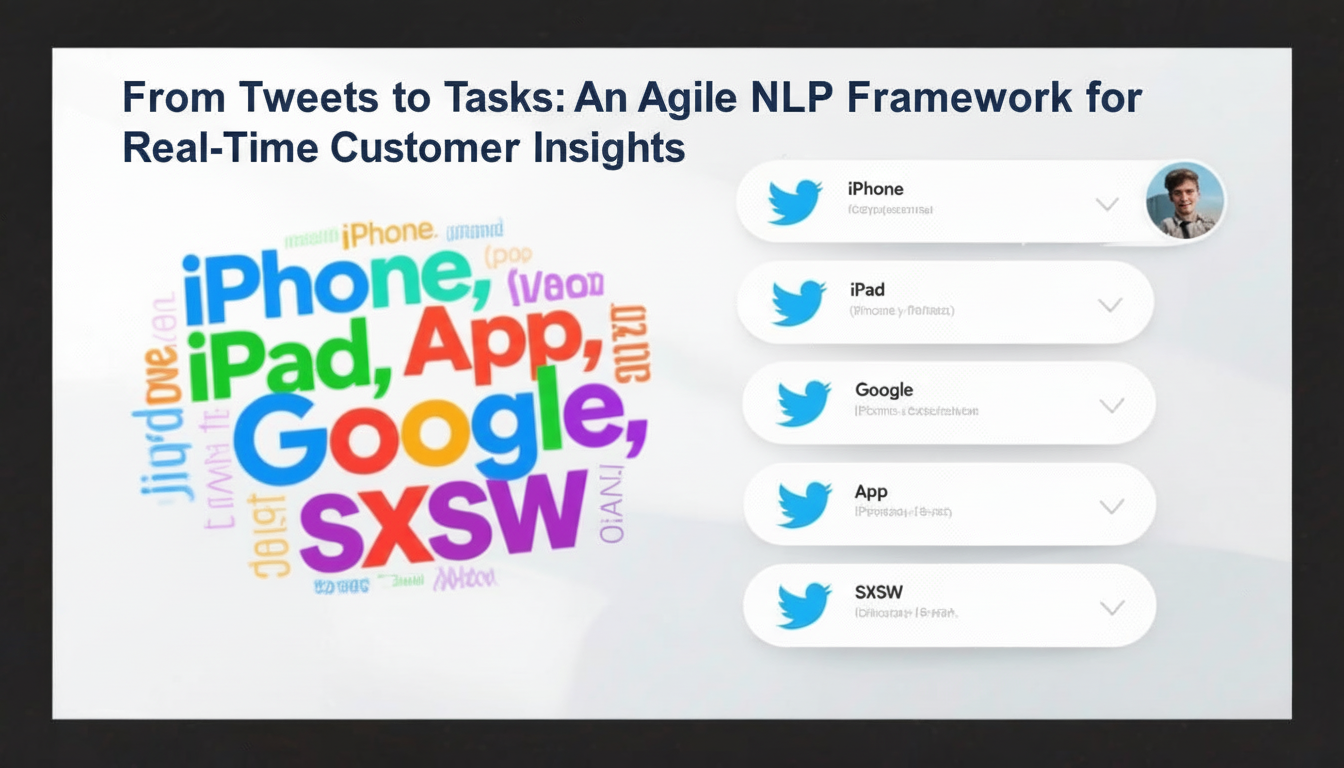

## Problem, Vision & Setup

### Problem Statement
During high-profile events like product launches or festivals (e.g., SXSW), brands are overwhelmed with thousands of social media posts.  
These tweets are short, noisy, and inconsistent, often filled with hashtags, mentions, emojis, or sarcasm.  

This creates several challenges:  
- Negative feedback may be missed until it escalates into a crisis.  
- Positive buzz may fade before it can be amplified.  
- Manual analysis is time-consuming, inconsistent, and biased.  

- This leads to a critical delay between what customers are saying in real time and how quickly product teams can act.


### Vision
To build an Agile-driven NLP solution that transforms unstructured tweets into clear, actionable sentiment insights, delivered in short sprints.  
This ensures product teams can:  
- Detect customer pain points faster.  
- Amplify positive engagement at the right time.  
- Continuously improve products and communication strategies.  


### Value Proposition
This project delivers value at multiple levels:  
- Product Teams: Cut turnaround time for insights from days to under 24 hours.  
- Decision-Makers: Access brand-level dashboards that highlight opportunities and risks.  
- Academia (Class Project): Demonstrates how Agile + NLP can solve real-world problems while building student expertise.  
- Scalability: Provides a reusable framework for analyzing other text sources (reviews, surveys, live social streams).  

### Objectives (Data Understanding & Preparation)

The focus of Sprint 1 is to understand and prepare the dataset before modeling.  

- Audit dataset structure (rows, columns, missing values, duplicates).  
- Explore sentiment label distribution (Positive, Negative, No Emotion).  
- Identify brand/product mentions and their frequency.  
- Analyze basic tweet characteristics (length, hashtags, mentions, URLs).  
- Draft a Data Card to document dataset quality, assumptions, and limitations.  
- Define baseline success metric (≥70% accuracy for the first classifier).  


### Approach (Sprint 1 Plan)
1. Data Audit → Inspect dataset size, nulls, and duplicates.  
2. Label Review → Check sentiment distribution and class imbalance.  
3. Target Review → Identify brand/product categories; flag ambiguous cases.  
4. Content Diagnostics → Evaluate text signals (hashtags, mentions, URLs, retweets).  
5. Documentation → Draft a Data Card summarizing dataset quality and risks.  
6. Agile Output → Deliverable = “A cleaned dataset + documented understanding of its structure and assumptions.” 



### Sprint 1 Backlog (Agile Demo)
| Task                          | Owner   | Status   |
|-------------------------------|---------|----------|
| Load and inspect dataset      | Elvis   | Done     |
| Handle duplicates & nulls     | Elvis   | Done     |
| Analyze labels distribution   | Esterina| Pending  |
| Review target categories      | Anne    | Pending  |
| Draft Data Card (quality doc) | Anne    | Pending  |



### Stakeholders
- Student Team : Gain practical experience applying Agile + NLP.  
- Instructor / Supervisor: Evaluate methodology, clarity, and delivery at each sprint.  
- Classmates (Peer Audience): Act as *end users*, validating whether outputs are understandable.  
- Industry Stakeholder (Hypothetical Product Manager): Would use insights to prioritize fixes, improve customer experience, and amplify positive trends.  



### Evaluation Plan
To measure success across sprints:  
- Accuracy / Macro-F1: ≥70% baseline performance for sentiment classification.  
- Coverage: At least 90% of tweets should map to a valid brand/product category.  
- Turnaround Time: Insights generated within <24 hours per batch.  
- Actionability: ≥3 insights per sprint must translate into backlog tasks.  



### Learning Outcomes (for Students)
By the end of this project, I will:  
- Apply Agile methods to a data science workflow.  
- Develop an NLP pipeline from cleaning → modeling → visualization.  
- Practice stakeholder communication by converting raw data into clear insights.  
- Understand and document ethical considerations (bias, PII, representativeness).  



### Ethical Considerations
- Data Privacy: Only public tweets used; no private information.  
- Bias Awareness: Tweets may over-represent tech-savvy or event-specific users.  
- Sarcasm/Irony: Sentiment labels may fail to capture nuance.  
- Transparency: Use of Data Cards to document dataset risks and limitations. 

#### The Approach

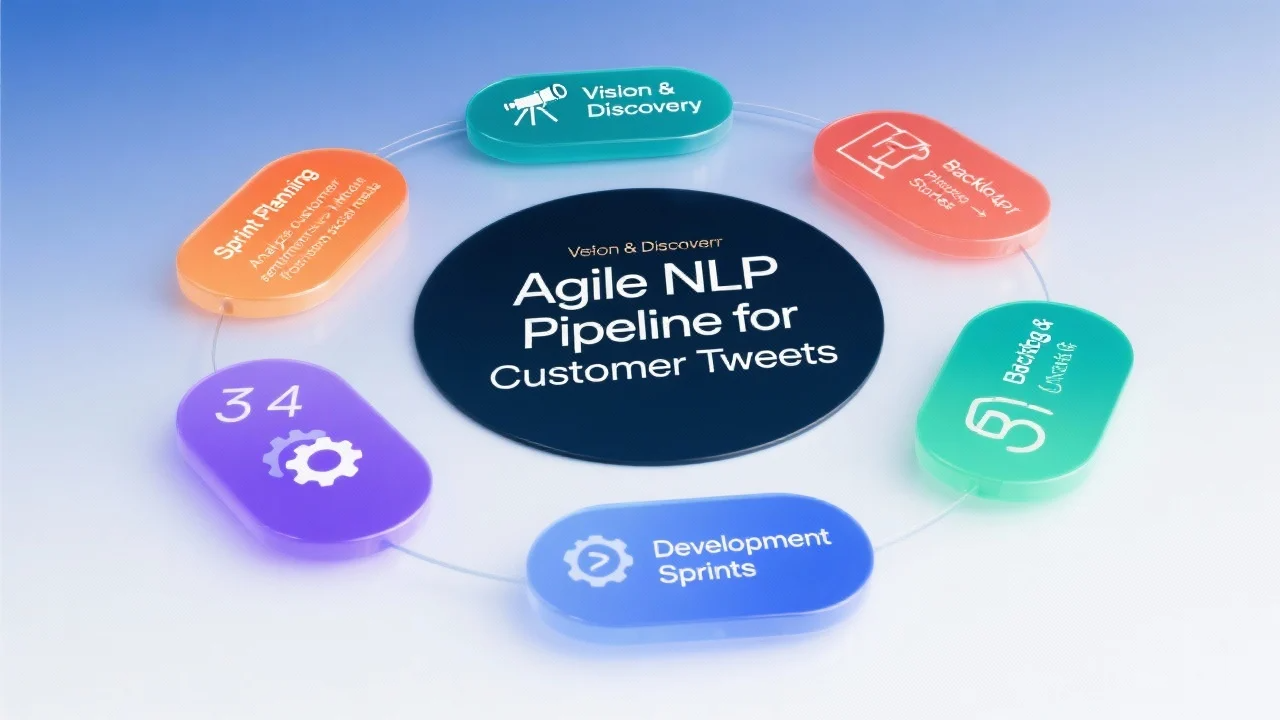

#### Sprint-1: Data Understanding & Preparation

**Goal** : Deliver a clean, well-documented dataset ready for modeling in Sprint-2.

| Task                    | Description                                               | Deliverable                     |
| ----------------------- | --------------------------------------------------------- | ------------------------------- |
| **Audit Dataset**       | Rows, columns, datatypes, nulls, duplicates               | `summary_table.csv`             |
| **Explore Labels**      | Distribution of emotions (Positive, Negative, No Emotion) | Plot + `label_distribution.csv` |
| **Explore Targets**     | Top mentioned brands/products                             | Plot + `target_top25.csv`       |
| **Content Diagnostics** | Tweet length, hashtags, mentions, URLs                    | `text_length_stats.json`        |
| **Cleaning Rules**      | Decide how to handle nulls, duplicates, noisy text        | Documented in notebook          |
| **Data Card**           | Dataset description, assumptions, risks, limitations      | `data_card.json`                |


In [69]:
# Import all the necessary libraries

# Core
import os
import re
import json
import datetime as dt

# Data
import numpy as np
import pandas as pd

# Visualization (EDA plots)
import matplotlib.pyplot as plt
import seaborn as sns  # optional but nice


#### 1) Load & Basic Audit

In [70]:
df = pd.read_csv("data/judge-1377884607_tweet_product_company.csv", encoding="latin1")
df.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

In [71]:
# Dataset shape and column info
shape = df.shape
columns = df.columns.tolist()
info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Checking for Missing Values

Missing values per column:
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Percentage of missing values:
tweet_text                                             0.01
emotion_in_tweet_is_directed_at                       63.81
is_there_an_emotion_directed_at_a_brand_or_product     0.00
dtype: float64


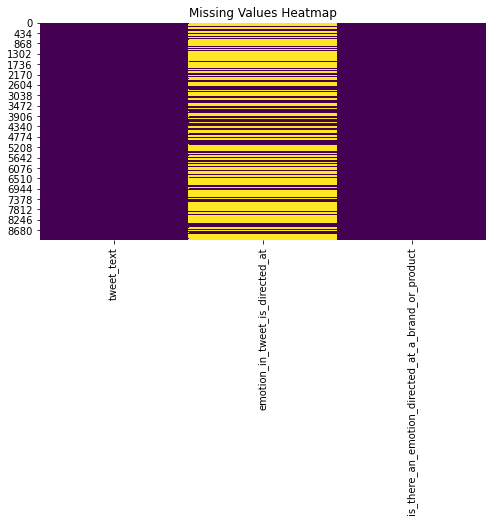

In [72]:
# Count missing values per column

print("Missing values per column:")
print(df.isnull().sum())

# Missing values - %
missing = df.isnull().mean() * 100
print("\nPercentage of missing values:")
print(missing.round(2))

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



### 2. Check for Duplicates

=== Duplicate Summary ===
Total rows: 9093
Duplicate rows (entire row match): 22 (0.24%)
Duplicate tweets (text only): 27 (0.3%)

=== Sample Duplicate Tweets ===
                                             tweet_text
7     #SXSW is just starting, #CTIA is around the co...
3962  #SXSW is just starting, #CTIA is around the co...
466      Before It Even Begins, Apple Wins #SXSW {link}
468      Before It Even Begins, Apple Wins #SXSW {link}
9     Counting down the days to #sxsw plus strong Ca...
2559  Counting down the days to #sxsw plus strong Ca...
774   Google to Launch Major New Social Network Call...
776   Google to Launch Major New Social Network Call...
17    I just noticed DST is coming this weekend. How...
8483  I just noticed DST is coming this weekend. How...

=== Top 10 Most Frequent Duplicate Tweets ===
                                          tweet_text  count
0  RT @mention Marissa Mayer: Google Will Connect...      5
1  RT @mention Google to Launch Major New Social ...   

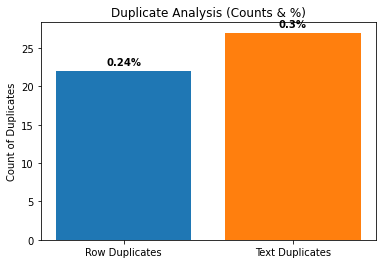

c:\Users\Levis\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Levis\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


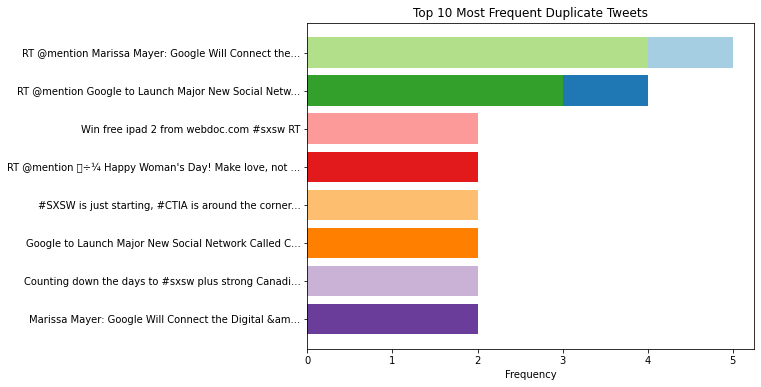

In [73]:
import matplotlib.pyplot as plt

# === Duplicate Checks ===

# Count duplicates
dup_rows = df.duplicated().sum()
dup_text = df.duplicated(subset=['tweet_text']).sum()
total_rows = len(df)

# Percentages
dup_rows_pct = round((dup_rows / total_rows) * 100, 2)
dup_text_pct = round((dup_text / total_rows) * 100, 2)

print("=== Duplicate Summary ===")
print(f"Total rows: {total_rows}")
print(f"Duplicate rows (entire row match): {dup_rows} ({dup_rows_pct}%)")
print(f"Duplicate tweets (text only): {dup_text} ({dup_text_pct}%)")

# Preview duplicate tweets
dup_examples = df[df.duplicated(subset=['tweet_text'], keep=False)].sort_values('tweet_text')
print("\n=== Sample Duplicate Tweets ===")
print(dup_examples[['tweet_text']].head(10))

# === Top 10 Most Frequent Duplicate Tweets ===
dup_freq = (
    df['tweet_text']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'tweet_text', 'tweet_text': 'count'})
)
dup_freq = dup_freq[dup_freq['count'] > 1].head(10)

print("\n=== Top 10 Most Frequent Duplicate Tweets ===")
print(dup_freq)

# Shorten tweet text for visualization labels (first 50 chars)
dup_freq['tweet_short'] = dup_freq['tweet_text'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)

# === Visualization 1: Duplicate counts (bar chart with contrasting colors) ===
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(
    ['Row Duplicates', 'Text Duplicates'], 
    [dup_rows, dup_text], 
    color=['#1f77b4','#ff7f0e']  # blue & orange
)

# Annotate with percentages
for bar, pct in zip(bars, [dup_rows_pct, dup_text_pct]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{pct}%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel("Count of Duplicates")
ax.set_title("Duplicate Analysis (Counts & %)")
plt.show()

# === Visualization 2: Top 10 duplicate tweets (horizontal bar chart with gradient colors) ===
colors = plt.cm.Paired(range(len(dup_freq)))  # nice diverse palette
plt.figure(figsize=(8,6))
plt.barh(dup_freq['tweet_short'], dup_freq['count'], color=colors)
plt.gca().invert_yaxis()  # Most frequent at top
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent Duplicate Tweets")
plt.show()





### 3. Label Exploration (sentiment distribution)

#### Goal → see how balanced the sentiment classes are.

=== Label Distribution ===
                                    count  percent
No emotion toward brand or product   5389    59.27
Positive emotion                     2978    32.75
Negative emotion                      570     6.27
I can't tell                          156     1.72


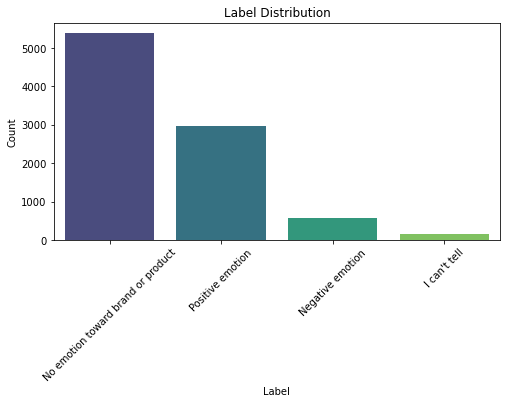

In [74]:
# Explore sentiment labels distribution
label_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(dropna=False)
label_pct = (label_counts / len(df) * 100).round(2)

print("=== Label Distribution ===")
print(pd.DataFrame({"count": label_counts, "percent": label_pct}))

# Visualize label distribution (before cleaning)
plt.figure(figsize=(8,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


- This shows whether “No Emotion” dominates (common in tweet datasets).
- If one label >70%, that’s a class imbalance risk to log in your Data Card.

### 4. Target Exploration (brands/products mentioned)

#### Goal → identify which brands/products get the most attention.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Target Distribution ===
target_counts = df['emotion_in_tweet_is_directed_at'].value_counts(dropna=False)
target_pct = (target_counts / len(df) * 100).round(2)

# Create dataframe for top 20 targets
target_df = pd.DataFrame({
    "count": target_counts,
    "percent": target_pct
}).head(20)

print("=== Top 20 Targets ===")
print(target_df)

# === Visualization: Ultra-Mega Tall Chart ===
plt.figure(figsize=(28,30), dpi=180)   # HUGE size, ideal for reports/posters
sns.barplot(
    y=target_df.index, 
    x=target_df['count'], 
    palette="viridis"
)

# Add both counts (inside bars) and percentages (outside bars)
for i, (count, pct) in enumerate(zip(target_df['count'], target_df['percent'])):
    plt.text(count/2, i, str(count), va='center', ha='center', fontsize=18, color="white", fontweight="bold")
    plt.text(count + max(target_df['count'])*0.01, i, f"{pct}%", va='center', fontsize=18, color="black", fontweight="bold")

# Titles and labels with extra-large fonts
plt.title("Top 20 Targets in Tweets (Brands/Products)", fontsize=34, fontweight='bold')
plt.xlabel("Tweet Count", fontsize=22)
plt.ylabel("Target", fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()



=== Top 20 Targets ===
                                 count  percent
NaN                               5802    63.81
iPad                               946    10.40
Apple                              661     7.27
iPad or iPhone App                 470     5.17
Google                             430     4.73
iPhone                             297     3.27
Other Google product or service    293     3.22
Android App                         81     0.89
Android                             78     0.86
Other Apple product or service      35     0.38


<ipython-input-75-da546f326c87>:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


- This helps to detect ambiguities (e.g., “iPad or iPhone App”)

### 5. Content Diagnostics (tweet structure)

#### Goal → measure text quality: length, hashtags, mentions, URLs.

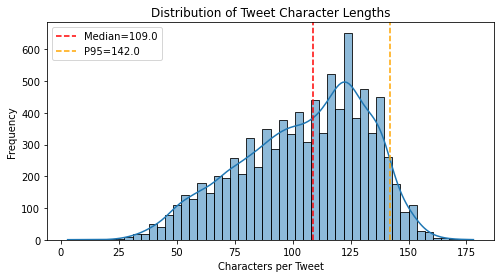

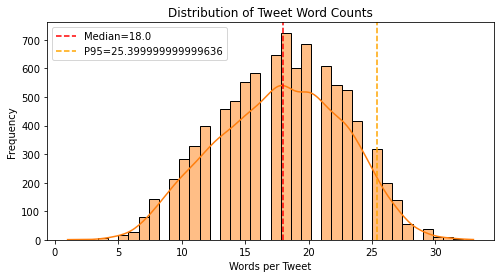

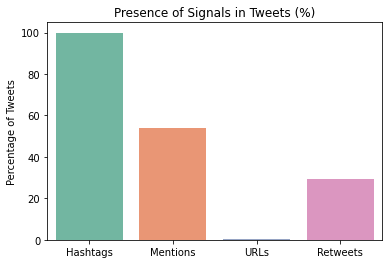

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Tweet length distributions ===
char_len = df['tweet_text'].astype(str).str.len()
word_len = df['tweet_text'].astype(str).str.split().str.len()

# Histogram for character lengths
plt.figure(figsize=(8,4))
sns.histplot(char_len, bins=50, kde=True, color="#1f77b4")
plt.axvline(char_len.median(), color='red', linestyle='--', label=f"Median={char_len.median()}")
plt.axvline(np.percentile(char_len,95), color='orange', linestyle='--', label=f"P95={np.percentile(char_len,95)}")
plt.title("Distribution of Tweet Character Lengths")
plt.xlabel("Characters per Tweet")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Histogram for word lengths
plt.figure(figsize=(8,4))
sns.histplot(word_len, bins=40, kde=True, color="#ff7f0e")
plt.axvline(word_len.median(), color='red', linestyle='--', label=f"Median={word_len.median()}")
plt.axvline(np.percentile(word_len,95), color='orange', linestyle='--', label=f"P95={np.percentile(word_len,95)}")
plt.title("Distribution of Tweet Word Counts")
plt.xlabel("Words per Tweet")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# === Tweet Signal Presence (bar chart) ===
has_hashtag = df['tweet_text'].astype(str).str.contains(r"#", regex=True, na=False)
has_mention = df['tweet_text'].astype(str).str.contains(r"@", regex=True, na=False)
has_url     = df['tweet_text'].astype(str).str.contains(r"http[s]?://", regex=True, na=False)
has_rt      = df['tweet_text'].astype(str).str.upper().str.contains(r"\bRT\b", na=False)

signal_stats = {
    "Hashtags": round(has_hashtag.mean() * 100, 2),
    "Mentions": round(has_mention.mean() * 100, 2),
    "URLs": round(has_url.mean() * 100, 2),
    "Retweets": round(has_rt.mean() * 100, 2),
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(signal_stats.keys()), y=list(signal_stats.values()), palette="Set2")
plt.title("Presence of Signals in Tweets (%)")
plt.ylabel("Percentage of Tweets")
plt.show()

### Data Cleaning 

- Drop rows missing labels
- Drop duplicate tweets  
- Normalize brand/product targets into `target_norm`  
- Clean text: lowercase, remove URLs/mentions, strip hashtags, drop punctuation, normalize whitespace  

In [77]:
# Sprint-1 Cleaning + Extended Report (RAW preserved, CLEANED saved separately)

RAW_PATH    = r"data/judge-1377884607_tweet_product_company.csv"              # raw stays intact
CLEAN_PATH  = r"data/judge-1377884607_tweet_product_company_cleaned.csv"      # cleaned output
REPORT_SUM  = r"data/cleaning_report.csv"                                     # high-level metrics
REPORT_MISS = r"data/missing_summary.csv"                                     # per-column missing stats
REPORT_LBL  = r"data/label_distribution.csv"                                  # class distribution
REPORT_TGT  = r"data/target_distribution_top20.csv"                           # top targets/brands

# ---------- Load raw (robust to encoding quirks) ----------
df_raw = pd.read_csv(RAW_PATH, encoding="latin1")
print(f"Loaded RAW: {RAW_PATH}  | shape={df_raw.shape}")

# Column sanity checks (expected Kaggle-style schema)
expected_cols = {
    "tweet_text",
    "emotion_in_tweet_is_directed_at",
    "is_there_an_emotion_directed_at_a_brand_or_product"
}
missing = expected_cols - set(df_raw.columns)
if missing:
    raise KeyError(f"Missing expected columns: {missing}\nFound columns: {list(df_raw.columns)}")

# ---------- Pre-clean audit (for report) ----------
rows_before         = len(df_raw)
dup_rows_all        = int(df_raw.duplicated().sum())
dup_rows_all_pct    = round(dup_rows_all / max(rows_before,1) * 100, 2)

dup_by_text         = int(df_raw.duplicated(subset=["tweet_text"]).sum())
dup_by_text_pct     = round(dup_by_text / max(rows_before,1) * 100, 2)

missing_counts      = df_raw.isna().sum()
missing_pct         = (df_raw.isna().mean() * 100).round(2)
missing_summary     = pd.DataFrame({"column": df_raw.columns,
                                    "missing_count": missing_counts.values,
                                    "missing_pct": missing_pct.values})

# Label distribution (raw)
lbl_col = "is_there_an_emotion_directed_at_a_brand_or_product"
lbl_counts_raw = df_raw[lbl_col].value_counts(dropna=False)
lbl_pct_raw    = (lbl_counts_raw / max(rows_before,1) * 100).round(2)
label_dist_raw = pd.DataFrame({"label": lbl_counts_raw.index.astype(str),
                               "count_raw": lbl_counts_raw.values,
                               "percent_raw": lbl_pct_raw.values})

# Target distribution (raw) — top 20
tgt_col = "emotion_in_tweet_is_directed_at"
tgt_counts_raw = df_raw[tgt_col].value_counts(dropna=False)
tgt_top20_raw  = tgt_counts_raw.head(20)
tgt_top20_pct  = (tgt_top20_raw / max(rows_before,1) * 100).round(2)
target_top20   = pd.DataFrame({"target": tgt_top20_raw.index.astype(str),
                               "count_raw": tgt_top20_raw.values,
                               "percent_raw": tgt_top20_pct.values})

# ---------- Cleaning Plan ----------
df = df_raw.copy()

# 1) Drop duplicate tweets based on text
dupes_removed = int(df.duplicated(subset=["tweet_text"]).sum())
df = df.drop_duplicates(subset=["tweet_text"]).reset_index(drop=True)

# 2) Drop rows with missing labels
before_drop = len(df)
df = df.dropna(subset=[lbl_col]).reset_index(drop=True)
dropped_missing_labels = before_drop - len(df)

# 3) Normalize brand/product targets into target_norm (extend this map after reviewing target_top20)
norm_map = {
    "iPad or iPhone App": "Apple iOS App",
    "iOS App": "Apple iOS App",
    "iPhone": "Apple iPhone",
    "iPad": "Apple iPad",
    "Android App": "Android",
    "Google": "Google",
    "Apple": "Apple",
    "Android": "Android",
}
df["target_norm"] = df[tgt_col].apply(lambda x: norm_map.get(x, x))

# 4) Clean text
def clean_text(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = s.lower()
    s = re.sub(r"http\S+", " ", s)          # remove URLs
    s = re.sub(r"@\w+", " ", s)             # remove @mentions
    s = re.sub(r"#", "", s)                 # strip '#' but keep the word
    s = re.sub(r"[^a-z0-9\s']", " ", s)     # keep alphanumeric + apostrophes
    s = re.sub(r"\s+", " ", s).strip()      # normalize whitespace
    return s

df["text_clean"] = df["tweet_text"].apply(clean_text)

# ---------- Post-clean metrics ----------
rows_after = len(df)

# Label distribution (clean)
lbl_counts_clean = df[lbl_col].value_counts(dropna=False)
lbl_pct_clean    = (lbl_counts_clean / max(rows_after,1) * 100).round(2)
label_dist_clean = pd.DataFrame({"label": lbl_counts_clean.index.astype(str),
                                 "count_clean": lbl_counts_clean.values,
                                 "percent_clean": lbl_pct_clean.values})

# Merge raw vs clean for labels (nice for stakeholders)
label_distribution = label_dist_raw.merge(label_dist_clean, on="label", how="outer").fillna(0)

# ---------- Save cleaned data ----------
df.to_csv(CLEAN_PATH, index=False, encoding="utf-8")
print(f"- Cleaned dataset saved -> {CLEAN_PATH}  | shape={df.shape}")

# ---------- Save reports ----------
# 1) High-level cleaning report (numbers + percentages)
summary_rows = [
    ["timestamp_utc", dt.datetime.utcnow().isoformat() + "Z"],
    ["raw_path", RAW_PATH],
    ["clean_path", CLEAN_PATH],
    ["rows_before", rows_before],
    ["rows_after", rows_after],
    ["duplicate_rows_all_raw", dup_rows_all],
    ["duplicate_rows_all_raw_pct", dup_rows_all_pct],
    ["duplicate_by_text_raw", dup_by_text],
    ["duplicate_by_text_raw_pct", dup_by_text_pct],
    ["duplicates_removed_by_text", dupes_removed],
    ["dropped_rows_missing_labels", dropped_missing_labels],
]
pd.DataFrame(summary_rows, columns=["metric", "value"]).to_csv(REPORT_SUM, index=False, encoding="utf-8")

# 2) Missing summary (counts + % per column, RAW)
missing_summary.to_csv(REPORT_MISS, index=False, encoding="utf-8")

# 3) Label distribution (raw vs clean)
label_distribution.to_csv(REPORT_LBL, index=False, encoding="utf-8")

# 4) Top targets (raw, with %)
target_top20.to_csv(REPORT_TGT, index=False, encoding="utf-8")

print(f"- Reports saved:\n- {REPORT_SUM}\n- {REPORT_MISS}\n- {REPORT_LBL}\n- {REPORT_TGT}")

# ---------- Quick console preview ----------
print("\n=== Cleaning Report (summary) ===")
print(pd.read_csv(REPORT_SUM))

print("\n=== Label Distribution (raw vs clean) ===")
print(pd.read_csv(REPORT_LBL).head(10))

print("\n=== Top 20 Targets (raw) ===")
print(pd.read_csv(REPORT_TGT).head(10))

print("\nPreview of cleaned data:")
print(df[["tweet_text", "text_clean", "emotion_in_tweet_is_directed_at", "target_norm"]].head())



Loaded RAW: data/judge-1377884607_tweet_product_company.csv  | shape=(9093, 3)
- Cleaned dataset saved -> data/judge-1377884607_tweet_product_company_cleaned.csv  | shape=(9066, 5)
- Reports saved:
- data/cleaning_report.csv
- data/missing_summary.csv
- data/label_distribution.csv
- data/target_distribution_top20.csv

=== Cleaning Report (summary) ===
                         metric  \
0                 timestamp_utc   
1                      raw_path   
2                    clean_path   
3                   rows_before   
4                    rows_after   
5        duplicate_rows_all_raw   
6    duplicate_rows_all_raw_pct   
7         duplicate_by_text_raw   
8     duplicate_by_text_raw_pct   
9    duplicates_removed_by_text   
10  dropped_rows_missing_labels   

                                                value  
0                         2025-08-30T16:30:01.949159Z  
1     data/judge-1377884607_tweet_product_company.csv  
2   data/judge-1377884607_tweet_product_company_cl...  
3

Outcome Summary

- Cleaned.csv : - cleaned dataset; RAW untouched

- cleaning_report.csv : - before/after, duplicates removed, % duplicates

- missing_summary.csv: - per-column missing counts & % on RAW

- label_distribution.csv - RAW vs CLEAN counts & %

- target_distribution_top20.csv : top brands/products & %